#Install library

In [81]:
import pandas as pd
import numpy as np

#Read Data

In [82]:
data = pd.read_csv("cleaned.csv")

In [ ]:
data.head(5)

,Unnamed: 0,App,App Id,Category,Content Rating,Rating,Installs,Metric,Reviews,Price,...,Developer Id,Developer,Developer Address,RatingCategorized,InstallsCategorized,MetricCategorized,ReviewsCategorized,PriceCategorized,minimum incomeCategorized,SizeCategorized
0,0,minecraft,com.mojang.minecraftp,arcad,everyone 10+,0.911148,0.0020,0.004629,0.008571,0.003176,...,4.77e+18,mojang,mojang\r\nmaria skolgata 83\r\n118 53\r\nstock...,Very High,Very Low,Medium,Very High,Very High,Very High,Low
1,1,minecraft,com.mojang.minecraftp,arcad,everyone 10+,0.911148,0.0020,0.004629,0.008571,0.003176,...,4.77e+18,mojang,mojang\r\nmaria skolgata 83\r\n118 53\r\nstock...,Very High,Very Low,Medium,Very High,Very High,Very High,Low
2,2,true skat,com.trueaxis.truesk,sport,everyon,0.876121,0.0010,0.001042,0.001488,0.003176,...,true+axi,true axi,po box 233\r\neltham vic 3095,Very High,Very Low,Very Low,Very Low,Very High,Very High,Low
3,3,hitman snip,com.squareenixmontreal.hitmansniperandroid,action,mature 17+,0.881289,0.0020,0.002397,0.008571,0.003176,...,square+enix+ltd,square enix ltd,240 blackfriars road\r\nlondon\r\nse1 8nw\r\nu...,Very High,Very Low,Low,Very High,Very High,Very High,High
4,4,grand theft auto: san andrea,com.rockstargames.gtasa,action,mature 17+,0.825836,0.0002,0.000567,0.008571,0.003176,...,7.09e+18,rockstar gam,622 broadway\r\n6th floor\r\nnew york ny 10012,Very High,Very Low,Very Low,Very High,Very High,Very High,Low


In [ ]:
data.columns
## category, rating??, metrics, reviews???, rating categorized, install catrgorize

Index(['Unnamed: 0', 'App', 'App Id', 'Category', 'Content Rating', 'Rating',
       'Installs', 'Metric', 'Reviews', 'Price', 'Currency', 'minimum income',
       'Ad Supported', 'In app purchases', 'Size', 'Version', 'Last update',
       'Released', 'Android version Text', 'Editor Choice', 'Developer Id',
       'Developer', 'Developer Address', 'RatingCategorized',
       'InstallsCategorized', 'MetricCategorized', 'ReviewsCategorized',
       'PriceCategorized', 'minimum incomeCategorized', 'SizeCategorized'],
      dtype='object')

In [83]:
unique_categories = data['Category'].unique()
category_to_int = {category: idx for idx, category in enumerate(unique_categories)}

data['Category'] = data['Category'].map(category_to_int)

In [ ]:
data['ReviewsCategorized'].unique()

array(['Very High', 'Very Low', 'Low'], dtype=object)

In [84]:
unique_categories = data['RatingCategorized'].unique()
category_to_int = {category: idx for idx, category in enumerate(unique_categories)}

data['RatingCategorized'] = data['RatingCategorized'].map(category_to_int)

In [85]:
unique_categories = data['InstallsCategorized'].unique()
category_to_int = {category: idx for idx, category in enumerate(unique_categories)}

data['InstallsCategorized'] = data['InstallsCategorized'].map(category_to_int)

In [86]:
unique_categories = data['ReviewsCategorized'].unique()
category_to_int = {category: idx for idx, category in enumerate(unique_categories)}

data['ReviewsCategorized'] = data['ReviewsCategorized'].map(category_to_int)

In [87]:
unique_categories = data['PriceCategorized'].unique()
category_to_int = {category: idx for idx, category in enumerate(unique_categories)}

data['PriceCategorized'] = data['PriceCategorized'].map(category_to_int)

In [88]:
unique_categories = data['minimum incomeCategorized'].unique()
category_to_int = {category: idx for idx, category in enumerate(unique_categories)}

data['minimum incomeCategorized'] = data['minimum incomeCategorized'].map(category_to_int)

In [89]:
unique_categories = data['SizeCategorized'].unique()
category_to_int = {category: idx for idx, category in enumerate(unique_categories)}

data['SizeCategorized'] = data['SizeCategorized'].map(category_to_int)

In [90]:
unique_categories = data['MetricCategorized'].unique()
category_to_int = {category: idx for idx, category in enumerate(unique_categories)}

data['MetricCategorized'] = data['MetricCategorized'].map(category_to_int)

In [93]:
data['Editor Choice'].unique()

array([ True, False])

#DBSCAN

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
x = data[['Category', 'Metric', 'RatingCategorized']].values
y = data[['MetricCategorized']].values
results = {}

m = DBSCAN(eps=1, min_samples=4)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
m.fit(X_train)
pre = m.fit_predict(X_test)
# sum = sum + accuracy_score(y_true=y_test, y_pred=pre)
results[f"eps={i}, min_samples={j}"] = accuracy_score(y_true=y_test, y_pred=pre)

results

{'eps=4, min_samples=4': 0.6423544465770953}

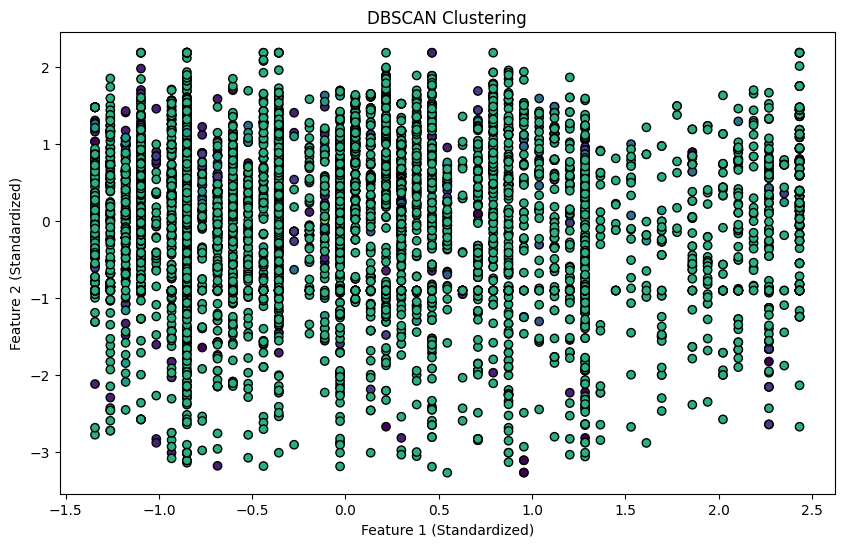

In [96]:
x = data[['Category', 'Rating', 'InstallsCategorized', 'MetricCategorized',
          'ReviewsCategorized', 'PriceCategorized', 'minimum incomeCategorized',
          'SizeCategorized']]

# Standardizing features
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

# Applying DBSCAN
dbscan = DBSCAN(eps=1, min_samples=4)
clusters = dbscan.fit_predict(x_scaled)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

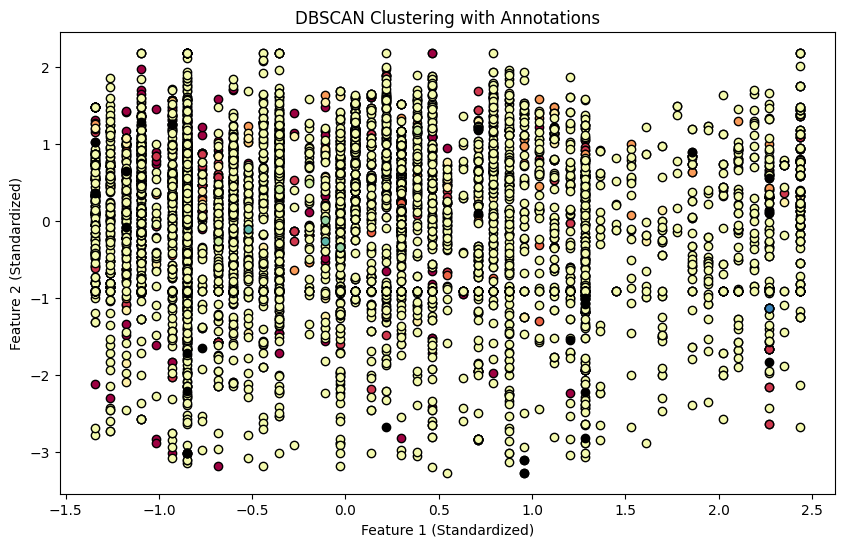

In [102]:
x = data[['Category', 'Rating', 'InstallsCategorized', 'MetricCategorized',
          'ReviewsCategorized', 'PriceCategorized', 'minimum incomeCategorized',
          'SizeCategorized']]

# Standardizing features
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

# Applying DBSCAN
dbscan = DBSCAN(eps=1, min_samples=4)
clusters = dbscan.fit_predict(x_scaled)

# Plotting
plt.figure(figsize=(10, 6))
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise

    class_member_mask = (clusters == k)
    xy = x_scaled[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

# Select 20 random points for annotation
np.random.seed(0)  # For reproducibility
indices = np.random.choice(len(x_scaled), 20, replace=False)

plt.title('DBSCAN Clustering with Annotations')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

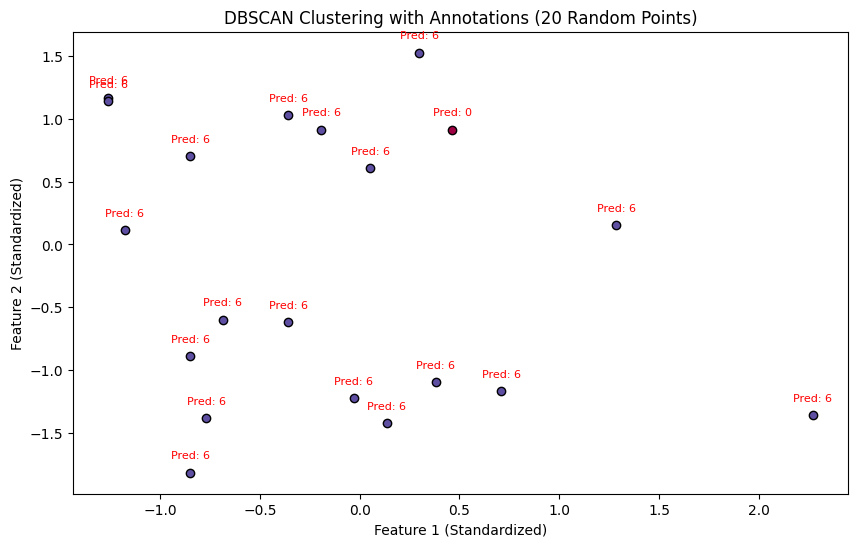

In [101]:
x = data[['Category', 'Rating', 'InstallsCategorized', 'MetricCategorized',
          'ReviewsCategorized', 'PriceCategorized', 'minimum incomeCategorized',
          'SizeCategorized']]

# Standardizing features
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

# Applying DBSCAN
dbscan = DBSCAN(eps=1, min_samples=4)
clusters = dbscan.fit_predict(x_scaled)

# Select 20 random points for plotting and annotation
np.random.seed(0)  # For reproducibility
indices = np.random.choice(len(x_scaled), 20, replace=False)
selected_points = x_scaled[indices]
selected_clusters = clusters[indices]

# Plotting
plt.figure(figsize=(10, 6))
unique_labels = set(selected_clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise

    class_member_mask = (selected_clusters == k)
    xy = selected_points[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

# Annotate 20 random points
for i, index in enumerate(indices):
    plt.annotate(f"Pred: {selected_clusters[i]}",
                 (selected_points[i, 0], selected_points[i, 1]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

plt.title('DBSCAN Clustering with Annotations (20 Random Points)')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

#svm

In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, KBinsDiscretizer
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [171]:
x = data[['Category', 'Installs', 'Metric', 'Reviews', 'Price', 'minimum income']]

# x = data[['Metric', 'Reviews']]
y = data['Rating']

# Binning the Rating into 3 categories
binning = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_binned = binning.fit_transform(y.values.reshape(-1, 1)).ravel()
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y_binned, test_size=0.25, random_state=0)

# Standardizing features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [172]:
# Support Vector Regression (SVR)
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_pred_binned = binning.transform(y_pred_svm.reshape(-1, 1)).ravel()

# Convert continuous predictions to discrete classes
y_pred_class = np.round(y_pred_binned).astype(int)

# Metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class, average='weighted')
recall = recall_score(y_test, y_pred_class, average='weighted')
f1 = f1_score(y_test, y_pred_class, average='weighted')

print(f'SVM Accuracy: {accuracy}')
print(f'SVM Precision: {precision}')
print(f'SVM Recall: {recall}')
print(f'SVM F1-Score: {f1}')

SVM Accuracy: 0.42226487523992323
SVM Precision: 0.6873725071654201
SVM Recall: 0.42226487523992323
SVM F1-Score: 0.25222228149082526


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_binned_rf = binning.transform(y_pred_rf.reshape(-1, 1)).ravel()

# Convert continuous predictions to discrete classes
y_pred_class_rf = np.round(y_pred_binned_rf).astype(int)

# Metrics
accuracy_rf = accuracy_score(y_test, y_pred_class_rf)
precision_rf = precision_score(y_test, y_pred_class_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_class_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_class_rf, average='weighted')

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Precision: {precision_rf}')
print(f'Random Forest Recall: {recall_rf}')
print(f'Random Forest F1-Score: {f1_rf}')

Random Forest Accuracy: 0.4504158669225848
Random Forest Precision: 0.5815771882442804
Random Forest Recall: 0.4504158669225848
Random Forest F1-Score: 0.3188401007242653


In [174]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_pred_binned_dt = binning.transform(y_pred_dt.reshape(-1, 1)).ravel()

# Convert continuous predictions to discrete classes
y_pred_class_dt = np.round(y_pred_binned_dt).astype(int)

# Metrics
accuracy_dt = accuracy_score(y_test, y_pred_class_dt)
precision_dt = precision_score(y_test, y_pred_class_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_class_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_class_dt, average='weighted')

print(f'Decision Tree Accuracy: {accuracy_dt}')
print(f'Decision Tree Precision: {precision_dt}')
print(f'Decision Tree Recall: {recall_dt}')
print(f'Decision Tree F1-Score: {f1_dt}')

Decision Tree Accuracy: 0.4325015994881638
Decision Tree Precision: 0.5046154097525205
Decision Tree Recall: 0.4325015994881638
Decision Tree F1-Score: 0.2850132829943049
